### IMPORT THE REQUIRED LIBRARIES FOR DATA LOADING, PRE-PROCESSING AND EDA

In [ ]:
#pip install pandas_profiling

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

### IMPORT THE DATASET

In [44]:
# Loading and checking the data set
hosp_readm=pd.read_excel("dataset.xlsx")
hosp_readm

y_14_related_noplanned  stay_days    x_year   x_99009   x_12015  \
0                           1   0.104415  1.414012 -0.501015 -0.617520   
1                           1  -0.171287  0.550544  0.301342 -0.130428   
2                           1  -0.033436  0.994541  0.301342 -0.130428   
3                           1   0.449042  1.110886 -0.501015  0.356664   
4                           1   0.724744  0.979448  1.103698  0.843756   
...                       ...        ...       ...       ...       ...   
21887                       0  -0.378064 -0.531777  0.301342 -0.617520   
21888                       0  -0.102362  0.290812 -0.501015  0.356664   
21889                       0  -0.653766 -0.094069  1.103698  0.356664   
21890                       0   0.035489  0.306535  0.301342  1.330848   
21891                       0   0.586893  0.485140  1.103698  0.843756   

       x_doctor_age  x_pneu_rehosp  ihospital    x_isex  x_chemical  \
0         -1.500159       0.759618  -0.972782 -1.174742   -0.161871   
1          0.782933       0.365740  -0.972782  0.851212   -0.161871   
2         -0.828661      -0.422018  -0.972782  0.851212   -0.161871   
3         -0.560062      -0.422018   1.316941 -1.174742   -0.161871   
4         -0.560062       1.153497   1.316941  0.851212   -0.161871   
...             ...            ...        ...       ...         ...   
21887     -0.022864      -0.422018   0.744510 -1.174742   -0.161871   
21888     -1.500159      -0.422018   0.744510  0.851212   -0.161871   
21889     -0.291463       1.153497   0.744510  0.851212   -0.161871   
21890     -1.634458      -0.422018   0.744510 -1.174742   -0.161871   
21891     -0.560062       0.365740   1.316941 -1.174742   -0.161871   

       x_dilator  x_immunity_chr  x_antibiotic_rear  x_pneu_strep_vaccine  \
0       1.469171       -0.308542           0.143213             -0.103266   
1      -0.680625        3.240904           0.143213             -0.103266   
2      -0.680625       -0.308542           0.143213             -0.103266   
3      -0.680625       -0.308542           0.143213             -0.103266   
4       1.469171       -0.308542           0.143213             -0.103266   
...          ...             ...                ...                   ...   
21887  -0.680625       -0.308542           0.143213             -0.103266   
21888  -0.680625       -0.308542           0.143213             -0.103266   
21889   1.469171       -0.308542           0.143213             -0.103266   
21890  -0.680625       -0.308542           0.143213             -0.103266   
21891   1.469171       -0.308542           0.143213             -0.103266   

       x_dementia    x_CPOD  x_discharge_plan  x_pneu_main_code  
0        1.772389  1.066695          1.259407         -1.265615  
1       -0.564184  1.066695          1.259407         -1.265615  
2        1.772389 -0.937432          1.259407          0.790094  
3       -0.564184  1.066695          1.259407          0.790094  
4        1.772389  1.066695         -0.793988          0.790094  
...           ...       ...               ...               ...  
21887   -0.564184  1.066695         -0.793988          0.790094  
21888    1.772389 -0.937432          1.259407         -1.265615  
21889   -0.564184  1.066695         -0.793988         -1.265615  
21890   -0.564184 -0.937432         -0.793988         -1.265615  
21891    1.772389  1.066695          1.259407         -1.265615  

[21892 rows x 18 columns]

### EXPLORING THE DATASET

In [45]:
# .describe() method computes and displays summary statistics for a Python dataframe
hosp_readm.describe()

y_14_related_noplanned     stay_days        x_year       x_99009  \
count            21892.000000  21892.000000  21892.000000  21892.000000   
mean                 0.055180     -0.005718     -0.044839     -0.003848   
std                  0.228336      1.001354      1.089900      0.998641   
min                  0.000000     -0.722692     -4.576175     -0.501015   
25%                  0.000000     -0.446989     -0.621708     -0.501015   
50%                  0.000000     -0.240213      0.241759     -0.501015   
75%                  0.000000      0.104415      0.751318      0.301342   
max                  1.000000     78.748432      2.090070     18.755544   

            x_12015  x_doctor_age  x_pneu_rehosp     ihospital        x_isex  \
count  21892.000000  21892.000000   21892.000000  21892.000000  21892.000000   
mean      -0.004405     -0.062076      -0.005254     -0.064925     -0.010087   
std        1.000456      1.177037       0.990357      1.188529      1.001580   
min       -0.617520     -6.469242      -0.422018     -6.697088     -1.174742   
25%       -0.617520     -0.694362      -0.422018     -0.972782     -1.174742   
50%       -0.130428     -0.157163      -0.422018     -0.972782      0.851212   
75%        0.356664      0.782933       0.365740      0.744510      0.851212   
max       16.917798      2.797427      16.908654      1.316941      0.851212   

         x_chemical     x_dilator  x_immunity_chr  x_antibiotic_rear  \
count  21892.000000  21892.000000    21892.000000       21892.000000   
mean      -0.001158     -0.006187       -0.002594          -0.065422   
std        0.996509      0.997539        0.996186           1.201319   
min       -0.161871     -0.680625       -0.308542          -6.982286   
25%       -0.161871     -0.680625       -0.308542           0.143213   
50%       -0.161871     -0.680625       -0.308542           0.143213   
75%       -0.161871      1.469171       -0.308542           0.143213   
max        6.177463      1.469171        3.240904           0.143213   

       x_pneu_strep_vaccine    x_dementia        x_CPOD  x_discharge_plan  \
count          2.189200e+04  21892.000000  21892.000000      21892.000000   
mean          -3.894808e-18     -0.007258     -0.010162         -0.009098   
std            1.000000e+00      0.995579      0.999291          0.997839   
min           -1.032659e-01     -0.564184     -0.937432         -0.793988   
25%           -1.032659e-01     -0.564184     -0.937432         -0.793988   
50%           -1.032659e-01     -0.564184     -0.937432         -0.793988   
75%           -1.032659e-01     -0.564184      1.066695          1.259407   
max            9.683299e+00      1.772389      1.066695          1.259407   

       x_pneu_main_code  
count      21892.000000  
mean          -0.012301  
std            1.002845  
min           -1.265615  
25%           -1.265615  
50%            0.790094  
75%            0.790094  
max            0.790094

In [46]:
# .info() function is used to get a concise summary of the dataframe
hosp_readm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   y_14_related_noplanned  21892 non-null  int64  
 1   stay_days               21892 non-null  float64
 2   x_year                  21892 non-null  float64
 3   x_99009                 21892 non-null  float64
 4   x_12015                 21892 non-null  float64
 5   x_doctor_age            21892 non-null  float64
 6   x_pneu_rehosp           21892 non-null  float64
 7   ihospital               21892 non-null  float64
 8   x_isex                  21892 non-null  float64
 9   x_chemical              21892 non-null  float64
 10  x_dilator               21892 non-null  float64
 11  x_immunity_chr          21892 non-null  float64
 12  x_antibiotic_rear       21892 non-null  float64
 13  x_pneu_strep_vaccine    21892 non-null  float64
 14  x_dementia              21892 non-null

In [47]:
# The function "shape" returns the shape of an array
hosp_readm.shape

(21892, 18)

In [48]:
#Unique Values in each variable
hosp_readm.nunique()

y_14_related_noplanned       2
stay_days                  121
x_year                    6040
x_99009                     22
x_12015                     34
x_doctor_age                38
x_pneu_rehosp               33
ihospital                    4
x_isex                       2
x_chemical                   2
x_dilator                    2
x_immunity_chr               2
x_antibiotic_rear            2
x_pneu_strep_vaccine         2
x_dementia                   2
x_CPOD                       2
x_discharge_plan             2
x_pneu_main_code             2
dtype: int64

In [49]:
# View the name of each variable
hosp_readm.columns

Index(['y_14_related_noplanned', 'stay_days', 'x_year', 'x_99009', 'x_12015',
       'x_doctor_age', 'x_pneu_rehosp', 'ihospital', 'x_isex', 'x_chemical',
       'x_dilator', 'x_immunity_chr', 'x_antibiotic_rear',
       'x_pneu_strep_vaccine', 'x_dementia', 'x_CPOD', 'x_discharge_plan',
       'x_pneu_main_code'],
      dtype='object')

## PRE-PROCESSING THE DATASET

In [50]:
# Selecting duplicate rows based on all columns
duplicates = hosp_readm.duplicated().sum()
duplicates

207

In [51]:
#drop duplicated rows
hosp_readm.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [52]:
#Check the shape of the array after dropping duplicates
hosp_readm.shape

(21685, 18)

## EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Correlation Heatmap')

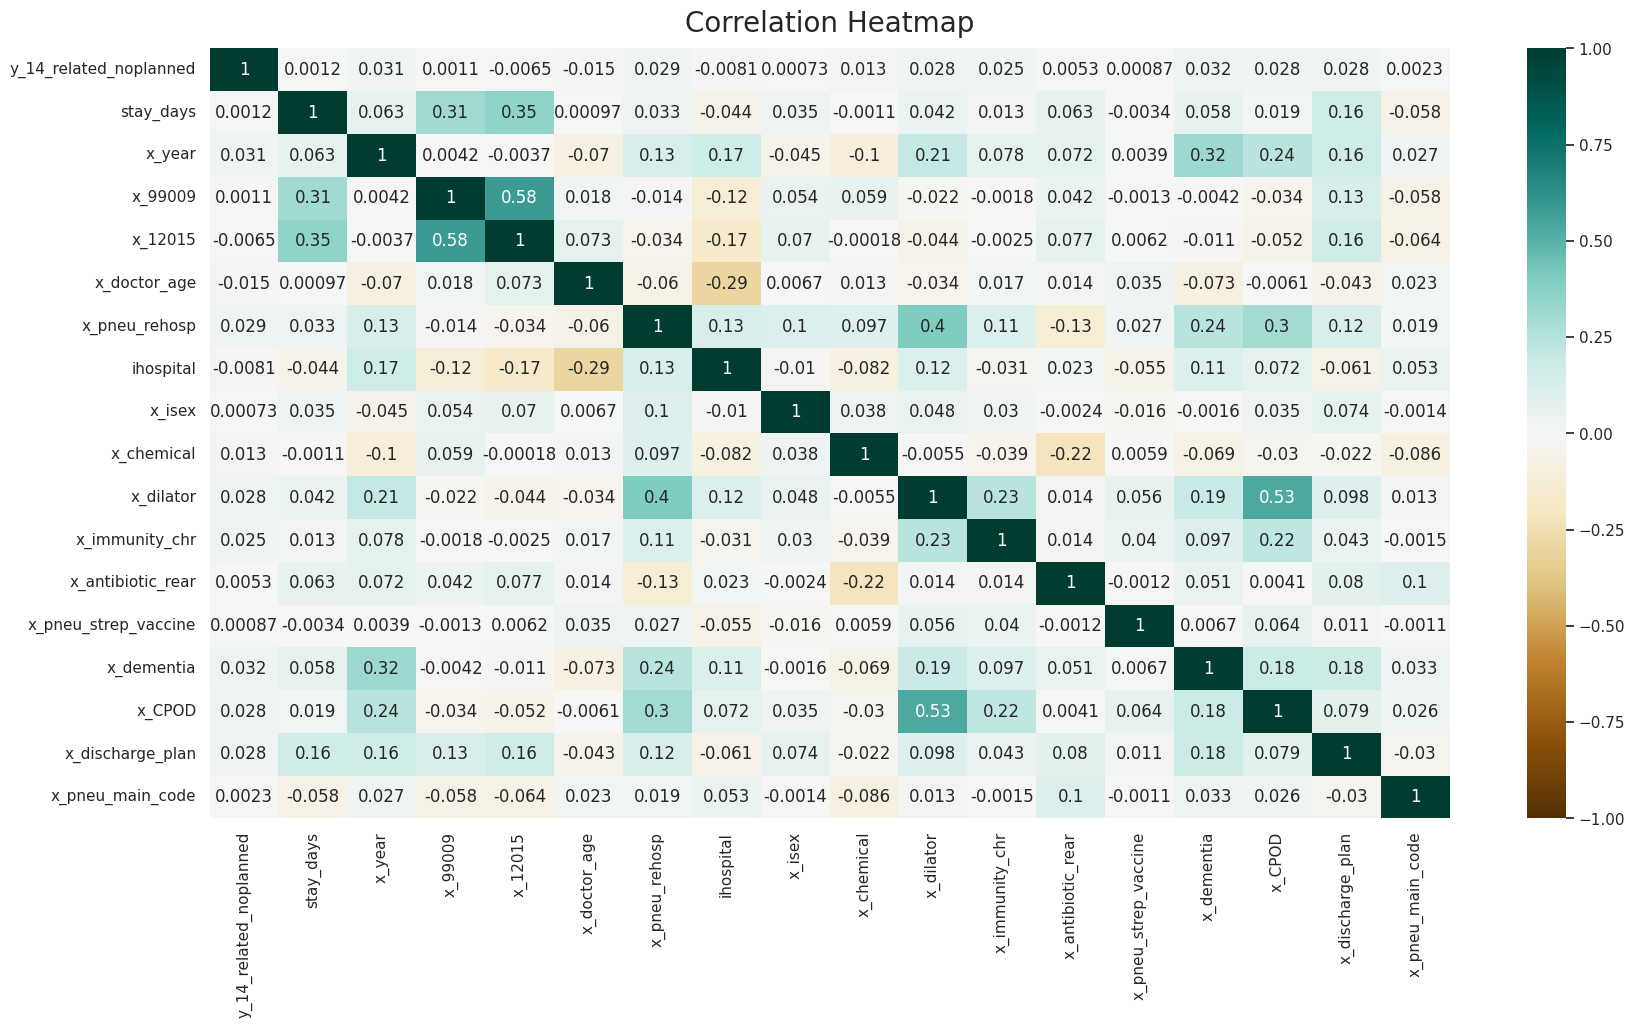

In [53]:
#A heatmap of the correlation matrix between the columns of the dataset
plt.figure(figsize = (20,10))
corr = hosp_readm.corr()
sns.heatmap(corr,  vmin = -1, vmax = 1, annot = True, cmap = "BrBG").set_title("Correlation Heatmap", fontdict = {"fontsize":20}, pad = 12)

##### From the correlation plot above, it can be seen that no variable is highly correlated with the other, so, we don't have to drop any variable.

Text(0.5, 1.0, 'Box plot to detect outliers in the varibles')

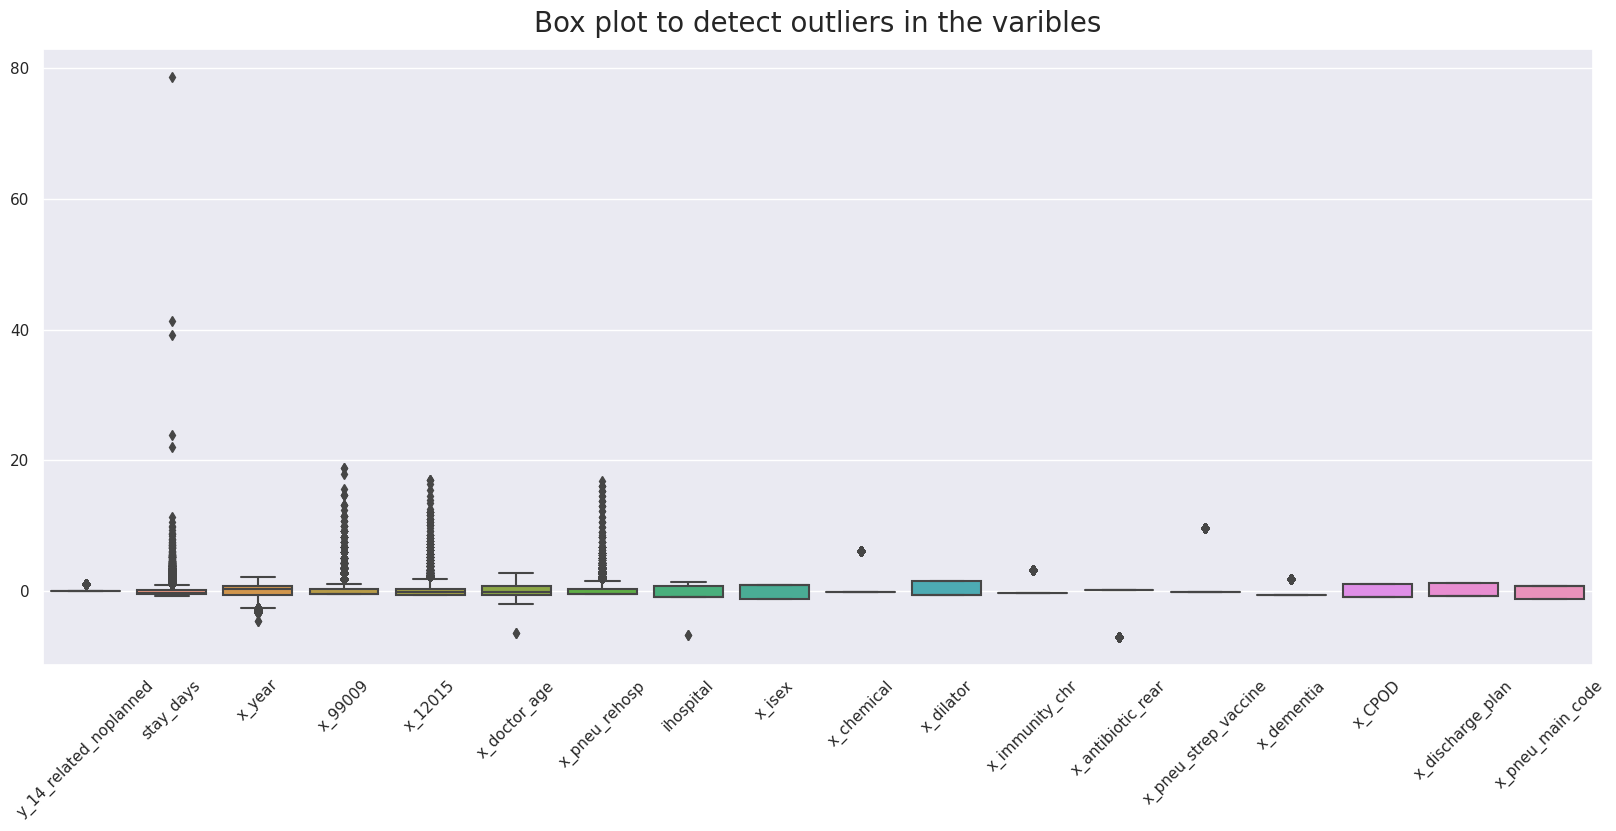

In [54]:
#A box plot to detect outliers in the variables of the dataset
sns.set(rc={'figure.figsize':(20,8)})
ax=sns.boxplot(data=hosp_readm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("Box plot to detect outliers in the varibles", fontdict = {"fontsize":20}, pad = 12)

<Figure size 500x500 with 0 Axes>

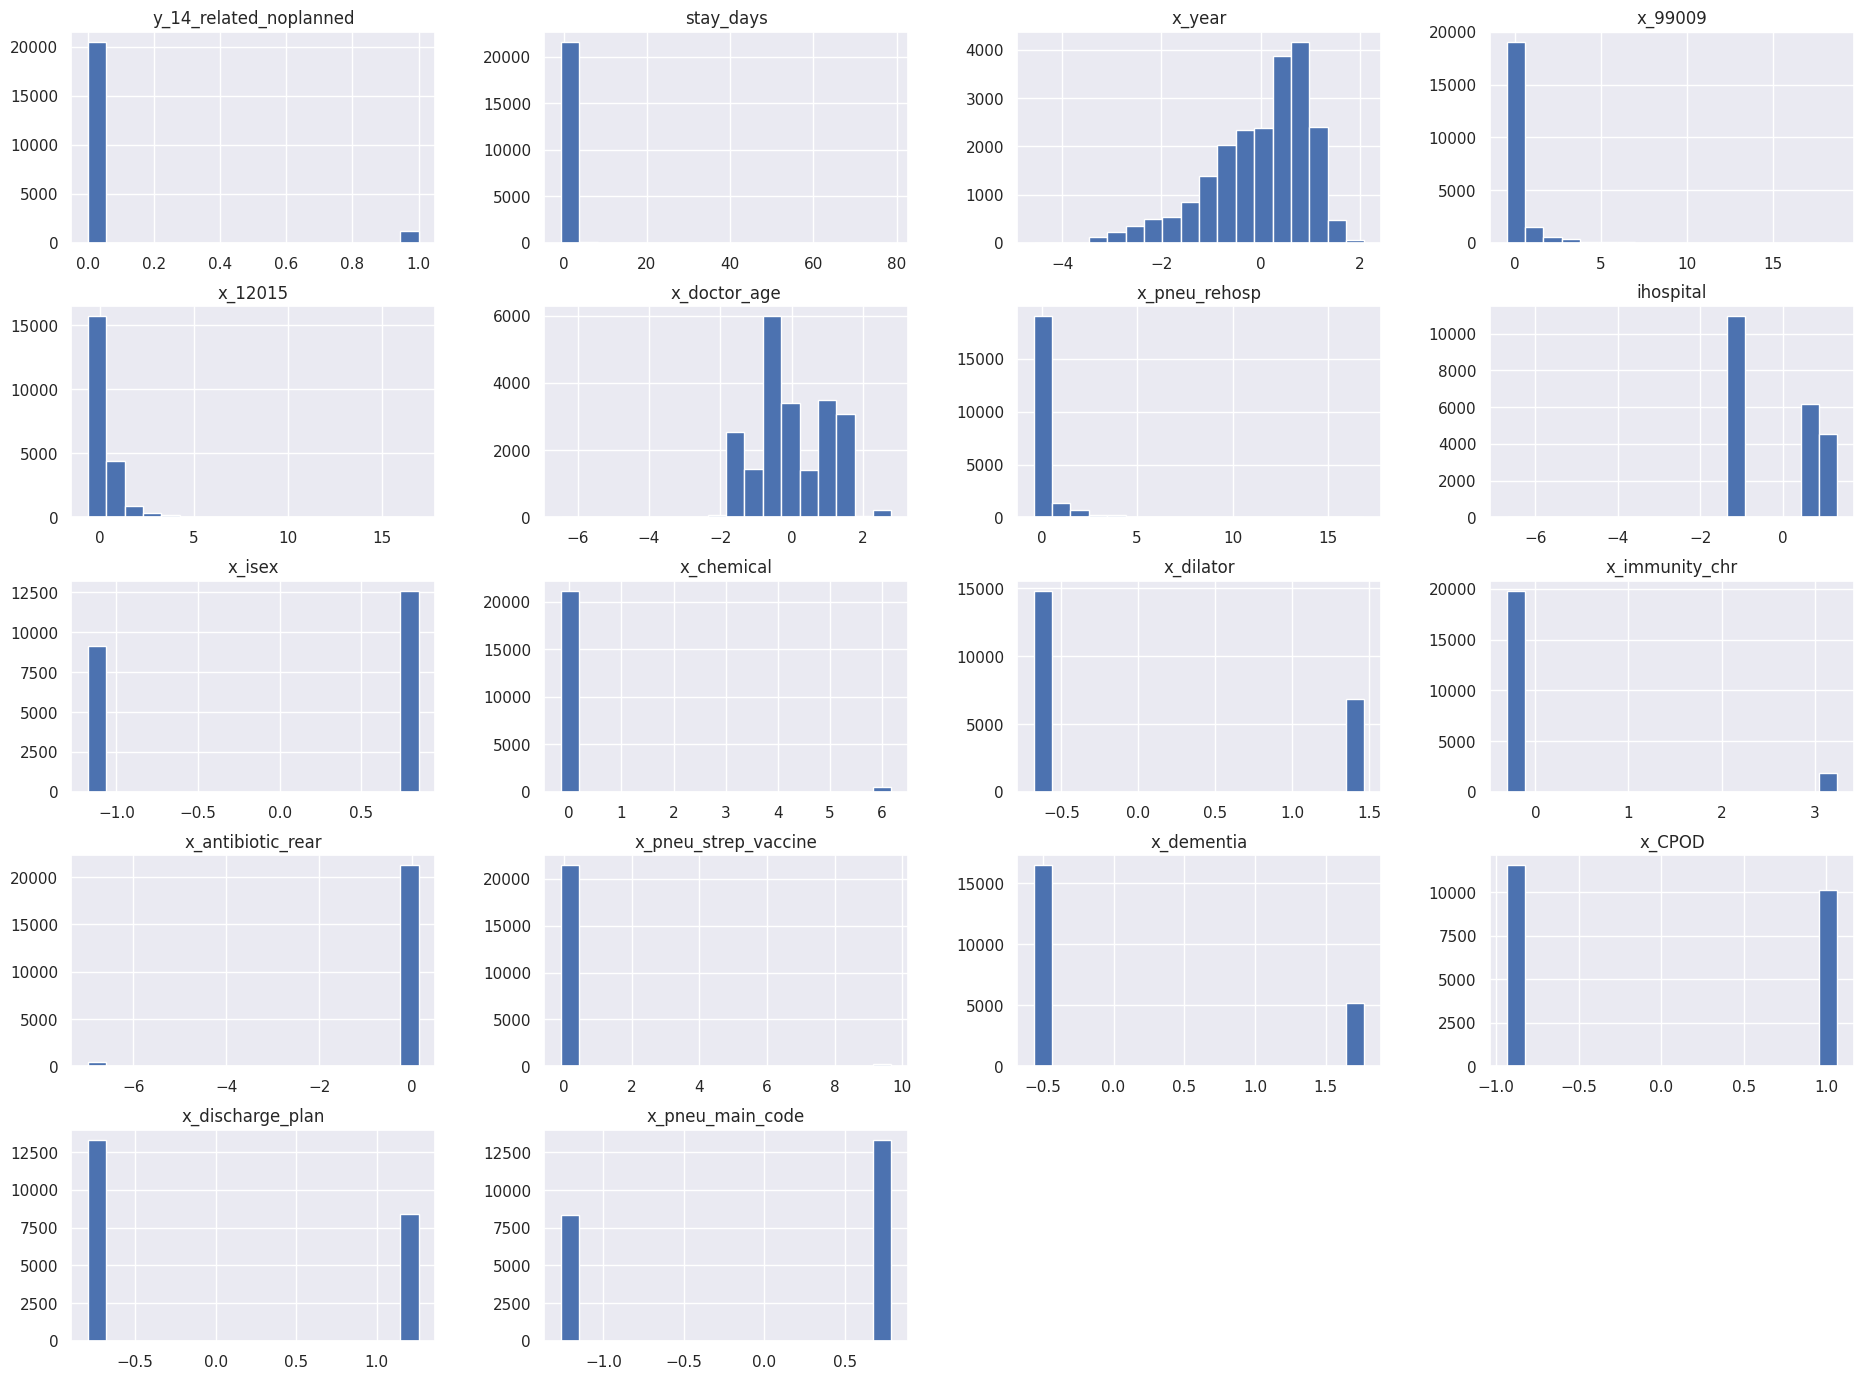

In [55]:
#A histograms for all columns of the hosp_readm dataset
plt.figure(figsize = (5,5))
hosp_readm.hist(bins = 18, figsize = (23,17))
plt.show()

Text(0.5, 1.0, 'Distribution of predicted values in the dataset')

<Figure size 2000x1000 with 0 Axes>

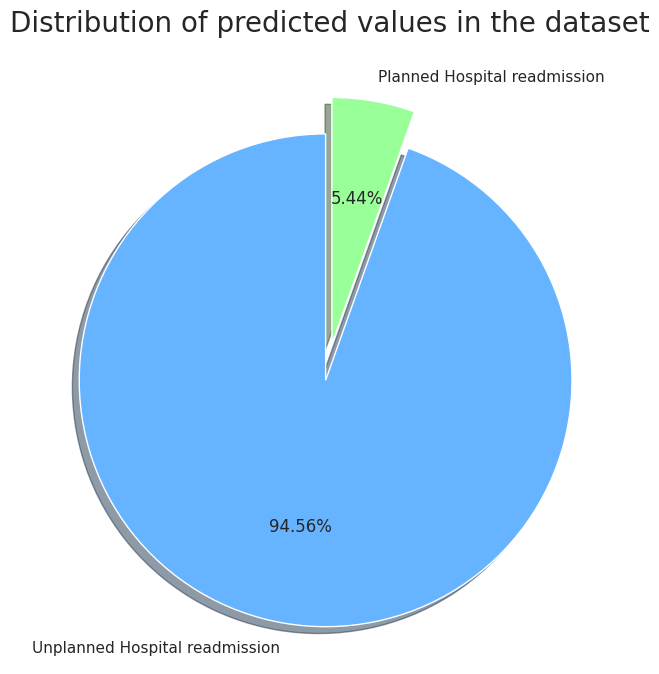

In [56]:
#A pie chart to show the distribution of predicted values for the y_14_related_noplanned column in the hosp_readm dataset
plt.figure(figsize = (20,10))
label=['Unplanned Hospital readmission', 'Planned Hospital readmission']
value_label=hosp_readm['y_14_related_noplanned'].value_counts()
explode=[0.1,0.05]
colors = ['#66b3ff','#99ff99']
fig,ax=plt.subplots()
ax.pie(value_label,explode=explode,labels=label, autopct='%1.2f%%', colors = colors, shadow=True, startangle=90)
ax.set_title('Distribution of predicted values in the dataset', fontdict = {"fontsize":20}, pad = 12)

In [57]:
# Generate the pandas profiling report
profile = ProfileReport(hosp_readm, title='Pandas Profiling Report', explorative=True)

# Save the report as an HTML file
profile.to_file("Hosp_readm_pandas_profile.html")

#View the pandas profile here
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## MACHINE LEARNING

#### IMPORT THE REQUIRED LIBRARIES FOR MACHINE LEARNING

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, auc,roc_curve

#### SPLIT THE DATASET

In [59]:
#Splitting the dataset
x=hosp_readm.drop("y_14_related_noplanned", axis=1)
y=hosp_readm.y_14_related_noplanned

#### NORMALIZE THE DATASET

In [60]:
#Normalize the value of x

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler object to your data and transform it
norm_hosp_readm = scaler.fit_transform(x)

# convert the normalized data to a pandas DataFrame
norm_hosp_readm = pd.DataFrame(norm_hosp_readm, columns=x.columns)

# show the first 5 rows of the normalized data
norm_hosp_readm.head()

stay_days    x_year   x_99009   x_12015  x_doctor_age  x_pneu_rehosp  \
0   0.010408  0.898585  0.000000  0.000000      0.536232       0.068182   
1   0.006938  0.769057  0.041667  0.027778      0.782609       0.045455   
2   0.008673  0.835660  0.041667  0.027778      0.608696       0.000000   
3   0.014744  0.853113  0.000000  0.055556      0.637681       0.000000   
4   0.018213  0.833396  0.083333  0.083333      0.637681       0.090909   

   ihospital  x_isex  x_chemical  x_dilator  x_immunity_chr  \
0   0.714286     0.0         0.0        1.0             0.0   
1   0.714286     1.0         0.0        0.0             1.0   
2   0.714286     1.0         0.0        0.0             0.0   
3   1.000000     0.0         0.0        0.0             0.0   
4   1.000000     1.0         0.0        1.0             0.0   

   x_antibiotic_rear  x_pneu_strep_vaccine  x_dementia  x_CPOD  \
0                1.0                   0.0         1.0     1.0   
1                1.0                   0.0         0.0     1.0   
2                1.0                   0.0         1.0     0.0   
3                1.0                   0.0         0.0     1.0   
4                1.0                   0.0         1.0     1.0   

   x_discharge_plan  x_pneu_main_code  
0               1.0               0.0  
1               1.0               0.0  
2               1.0               1.0  
3               1.0               1.0  
4               0.0               1.0

#### SPLIT INTO TEST AND TRAIN

In [61]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print (x_train.shape), print (y_train.shape)
print (x_test.shape), print (y_test.shape)

(17348, 17)
(17348,)
(4337, 17)
(4337,)


(None, None)

In [62]:
#Count the unique values in the y_train series
y_train.value_counts()

0    16384
1      964
Name: y_14_related_noplanned, dtype: int64

#### BALANCING OF THE DATASET

In [63]:
# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy=0.7)
steps = [('u', undersample)]
pipeline = Pipeline(steps=steps)

x_train, y_train = pipeline.fit_resample(x_train, y_train)

In [64]:
#Count the unique values in the y_train series after balancing the dataset
y_train.value_counts()

0    1377
1     964
Name: y_14_related_noplanned, dtype: int64

Text(0.5, 1.0, 'Distribution of predicted values in the dataset')

<Figure size 2000x1000 with 0 Axes>

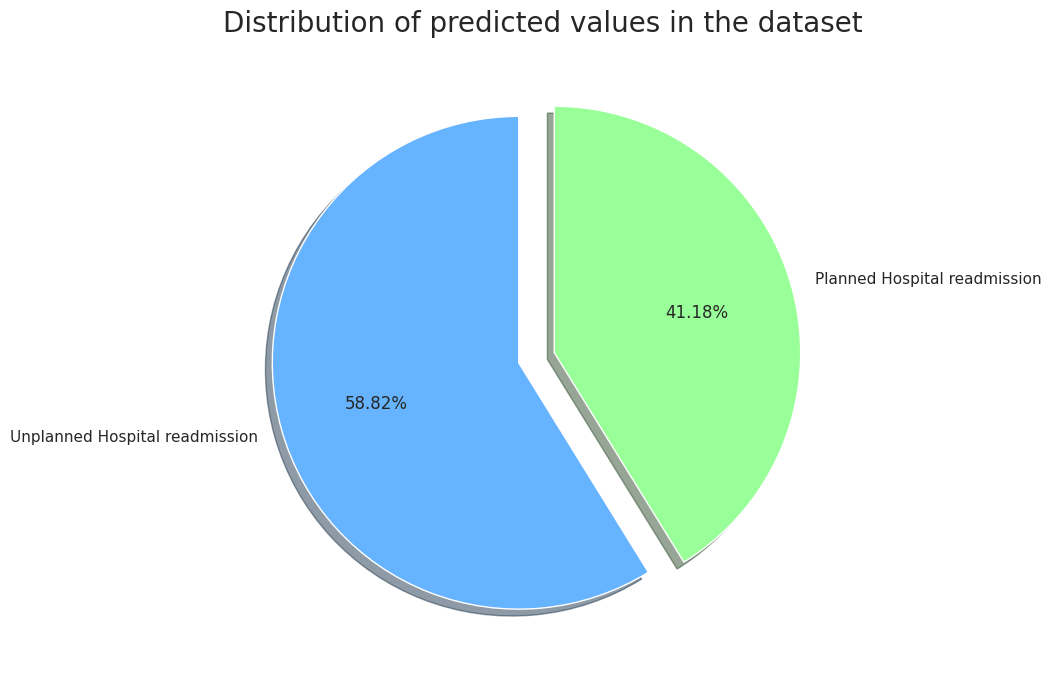

In [65]:
plt.figure(figsize = (20,10))
label=['Unplanned Hospital readmission', 'Planned Hospital readmission']
value_label=y_train.value_counts()
explode=[0.1,0.05]
colors = ['#66b3ff','#99ff99']
fig,ax=plt.subplots()
ax.pie(value_label,explode=explode,labels=label, autopct='%1.2f%%', colors = colors, shadow=True, startangle=90)
ax.set_title('Distribution of predicted values in the dataset', fontdict = {"fontsize":20}, pad = 12)

#### BUILDING MACHINE LEARNING MODELS

In [66]:
#Print the name of the score, the value of the score, and the best hyperparameters for each model
Models = ["KNN", "logistic_Regression", "Random_Forest", "Naive_Bayes", "Linear_SVM", "Decision_Tree"]

scores = {score: [] for score in ["Accuracy", "Precision", "Recall", "F1", "AUC"]}

classifiers = [KNeighborsClassifier(5),
               LogisticRegression(penalty="l2", max_iter=1000),
               RandomForestClassifier(max_depth=5, n_estimators=100),
               GaussianNB(),
               SVC(kernel="linear", C=0.1),
               DecisionTreeClassifier(max_depth=5)]

hyperparameters = {
    "KNN": {"n_neighbors": [3, 5, 7]},
    "logistic_Regression": {"C": [0.1, 0.5, 1.0]},
    "Random_Forest": {"max_depth": [5, 10, 20]},
    "Naive_Bayes": {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
    "Linear_SVM": {"C": [0.1, 0.5, 1.0]},
    "Decision_Tree": {"max_depth": [5, 10, 20]}
}

for name, clf in zip(Models, classifiers):
    params = hyperparameters.get(name, {})
    clf = GridSearchCV(clf, params, cv=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    scores["Accuracy"].append(accuracy_score(y_test, y_pred))
    print(f"{name}:\n\tAccuracy: {scores['Accuracy'][-1]:.3f}\n\tBest parameters: {clf.best_params_}\n")
    scores["Precision"].append(precision_score(y_test, y_pred))
    print(f"\tPrecision: {scores['Precision'][-1]:.3f}\n\tBest parameters: {clf.best_params_}\n")
    scores["Recall"].append(recall_score(y_test, y_pred))
    print(f"\tRecall: {scores['Recall'][-1]:.3f}\n\tBest parameters: {clf.best_params_}\n")
    scores["F1"].append(f1_score(y_test, y_pred))
    print(f"\tF1: {scores['F1'][-1]:.3f}\n\tBest parameters: {clf.best_params_}\n")
    scores["AUC"].append(roc_auc_score(y_test, y_pred))
    print(f"\tAUC: {scores['AUC'][-1]:.3f}\n\tBest parameters: {clf.best_params_}\n")

KNN:
	Accuracy: 0.671
	Best parameters: {'n_neighbors': 7}

	Precision: 0.062
	Best parameters: {'n_neighbors': 7}

	Recall: 0.400
	Best parameters: {'n_neighbors': 7}

	F1: 0.107
	Best parameters: {'n_neighbors': 7}

	AUC: 0.542
	Best parameters: {'n_neighbors': 7}

logistic_Regression:
	Accuracy: 0.881
	Best parameters: {'C': 0.1}

	Precision: 0.051
	Best parameters: {'C': 0.1}

	Recall: 0.079
	Best parameters: {'C': 0.1}

	F1: 0.062
	Best parameters: {'C': 0.1}

	AUC: 0.501
	Best parameters: {'C': 0.1}

Random_Forest:
	Accuracy: 0.910
	Best parameters: {'max_depth': 5}

	Precision: 0.056
	Best parameters: {'max_depth': 5}

	Recall: 0.051
	Best parameters: {'max_depth': 5}

	F1: 0.053
	Best parameters: {'max_depth': 5}

	AUC: 0.503
	Best parameters: {'max_depth': 5}

Naive_Bayes:
	Accuracy: 0.807
	Best parameters: {'var_smoothing': 1e-09}

	Precision: 0.056
	Best parameters: {'var_smoothing': 1e-09}

	Recall: 0.181
	Best parameters: {'var_smoothing': 1e-09}

	F1: 0.085
	Best paramete

#### PREDICTIONS FROM THE MACHINE LEARNING MODELS

#### RESULTS OF THE PREDICTIONS

In [67]:
#A Pandas DataFrame object called that contains the evaluation metrics for each model
results = pd.DataFrame(data=scores, index=Models)
results

Accuracy  Precision    Recall        F1       AUC
KNN                  0.670740   0.062094  0.400000  0.107500  0.542431
logistic_Regression  0.881024   0.050746  0.079070  0.061818  0.500961
Random_Forest        0.909846   0.055556  0.051163  0.053269  0.502898
Naive_Bayes          0.806779   0.055635  0.181395  0.085153  0.510397
Linear_SVM           0.925063   0.025862  0.013953  0.018127  0.493270
Decision_Tree        0.795942   0.066062  0.237209  0.103343  0.531147

#### RESULTS OF THE PREDICTIONS IN DESCENDING ORDER

In [68]:
#The dataframe sorted by accuracy and f1
results.sort_values(by= ["Accuracy","F1"], ascending=False)

Accuracy  Precision    Recall        F1       AUC
Linear_SVM           0.925063   0.025862  0.013953  0.018127  0.493270
Random_Forest        0.909846   0.055556  0.051163  0.053269  0.502898
logistic_Regression  0.881024   0.050746  0.079070  0.061818  0.500961
Naive_Bayes          0.806779   0.055635  0.181395  0.085153  0.510397
Decision_Tree        0.795942   0.066062  0.237209  0.103343  0.531147
KNN                  0.670740   0.062094  0.400000  0.107500  0.542431

#### PLOTTING CONFUSION MATRIX

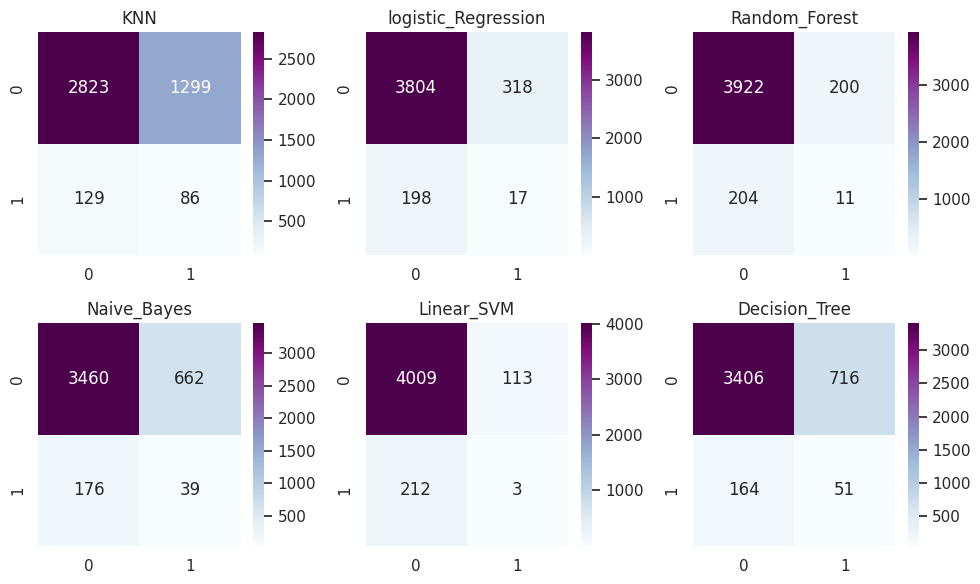

In [69]:
#Plot confusion Matrix
_, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.ravel()
for i, name in enumerate(Models):
    clf = classifiers[i]
    params = hyperparameters.get(name, {})
    clf = GridSearchCV(clf, params, cv=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.BuPu, ax=ax[i])
    ax[i].set_title(name)
plt.tight_layout()
plt.show()

#### ROC CURVE OF THE MODELS

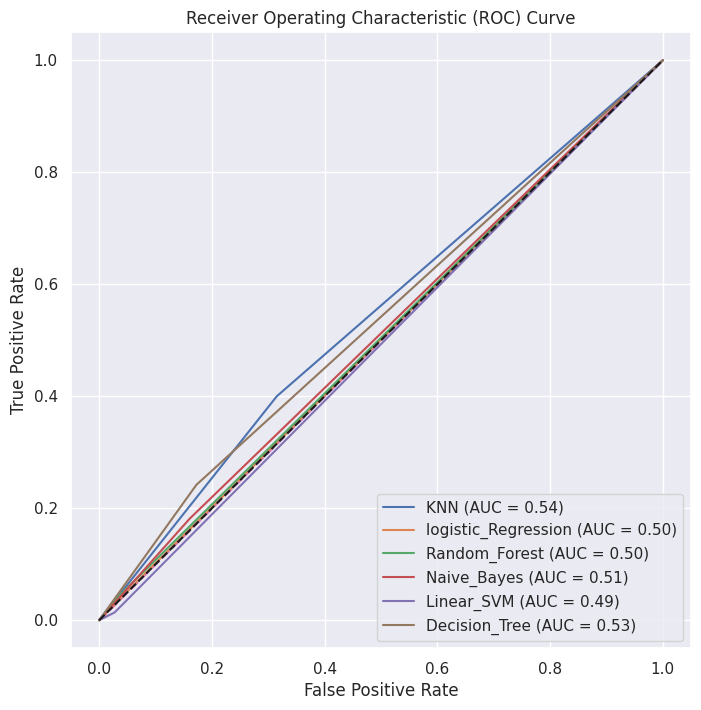

In [70]:
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], color='orchid', lw=2, linestyle='--')

for name, clf in zip(Models, classifiers):
    params = hyperparameters.get(name, {})
    clf = GridSearchCV(clf, params, cv=5)
    clf.fit(x_train, y_train)
    y_pred_proba = clf.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#### DEEP LEARNING

In [71]:
# Define the number of time steps and features
timesteps = x_train.shape[1]
features = 1

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32) #validation_data=(x_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred_binary))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Epoch 1/10
74/74 [==============================] - 3s 10ms/step - loss: 0.6778 - accuracy: 0.5797
Epoch 2/10
74/74 [==============================] - 1s 10ms/step - loss: 0.6759 - accuracy: 0.5839
Epoch 3/10
74/74 [==============================] - 1s 10ms/step - loss: 0.6740 - accuracy: 0.5891
Epoch 4/10
74/74 [==============================] - 1s 10ms/step - loss: 0.6740 - accuracy: 0.5886
Epoch 5/10
74/74 [==============================] - 1s 10ms/step - loss: 0.6745 - accuracy: 0.5912
Epoch 6/10
74/74 [==============================] - 1s 11ms/step - loss: 0.6737 - accuracy: 0.5903
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 0.6739 - accuracy: 0.5903
Epoch 8/10
74/74 [==============================] - 1s 11ms/step - loss: 0.6733 - accuracy: 0.5869
Epoch 9/10
74/74 [==============================] - 1s 11ms/step - loss: 0.6743 - accuracy: 0.5844
Epoch 10/10
136/136 [==============================] - 2s 6ms/step - loss: 0.5453 - accuracy: 0.8981
Test los

In [72]:
# Convert DataFrame to numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# Define the input shape
input_shape = (x_train.shape[1], 1)

# Reshape the data to have 1 channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred_binary))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Epoch 1/10
74/74 [==============================] - 1s 6ms/step - loss: 0.6836 - accuracy: 0.5758
Epoch 2/10
74/74 [==============================] - 0s 6ms/step - loss: 0.6754 - accuracy: 0.5968
Epoch 3/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5818
Epoch 4/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.5950
Epoch 5/10
74/74 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5993
Epoch 6/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6725 - accuracy: 0.5997
Epoch 7/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5942
Epoch 8/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.5993
Epoch 9/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.5976
Epoch 10/10
74/74 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5959
Test accuracy: 0.90

In [73]:
# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred_binary))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

Epoch 1/10
74/74 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.5673
Epoch 2/10
74/74 [==============================] - 0s 2ms/step - loss: 0.6707 - accuracy: 0.5985
Epoch 3/10
74/74 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6070
Epoch 4/10
74/74 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.6126
Epoch 5/10
74/74 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6190
Epoch 6/10
74/74 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6185
Epoch 7/10
74/74 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6211
Epoch 8/10
74/74 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6275
Epoch 9/10
74/74 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.6339
Epoch 10/10
74/74 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6429
Test loss: 0.5542
T